In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('wine.csv')


In [ ]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [ ]:
df.shape


(178, 14)

In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

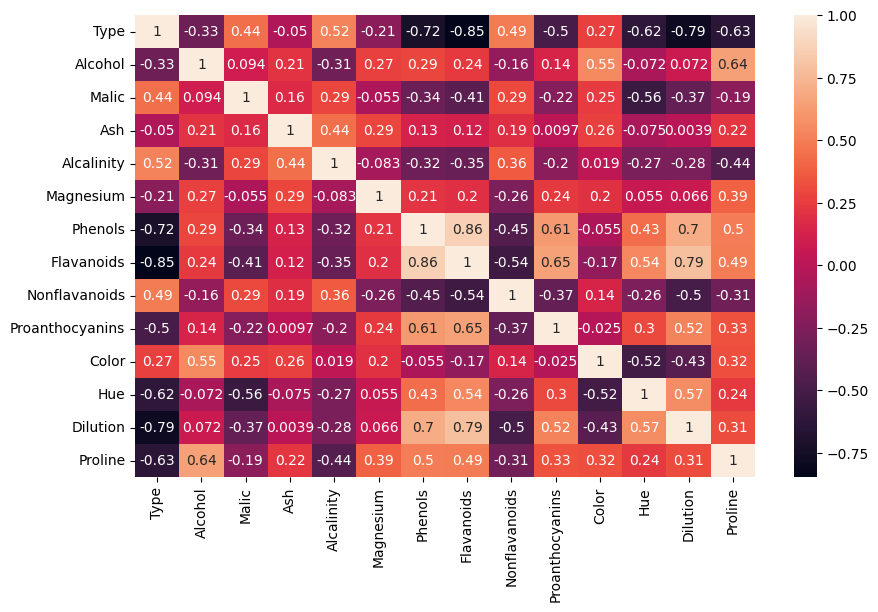

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.iloc[:,[0,1,2]]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

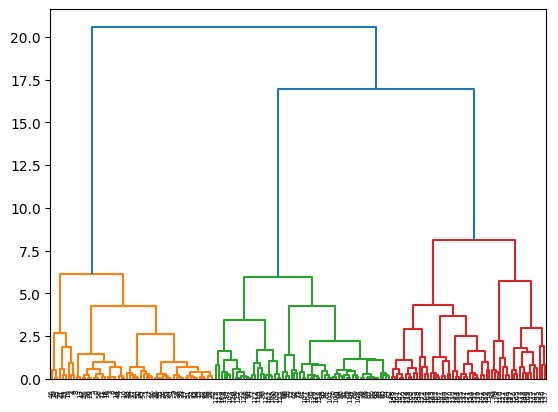

In [ ]:
import scipy.cluster.hierarchy as sch
dgram = sch.dendrogram(sch.linkage(X,method='ward'))


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [ ]:
pca.n_components_

3

In [ ]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [ ]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187])

In [ ]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

Text(0, 0.5, 'Variance ratio')

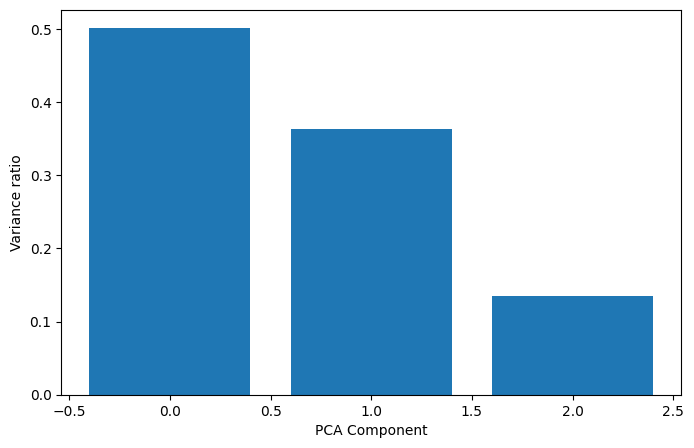

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(range(3), pca.explained_variance_ratio_,label='variance ratio')
plt.xlabel('PCA Component')
plt.ylabel('Variance ratio')

In [ ]:
X = df.iloc[:,[0,1,2]]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')
y_pred = clustering.fit(X)
y_pred1 = clustering.fit_predict(X)

In [ ]:
y_pred

AgglomerativeClustering(n_clusters=4)

In [ ]:
df['cluster_id'] = y_pred.labels_


In [ ]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


<Axes: xlabel='cluster_id', ylabel='count'>

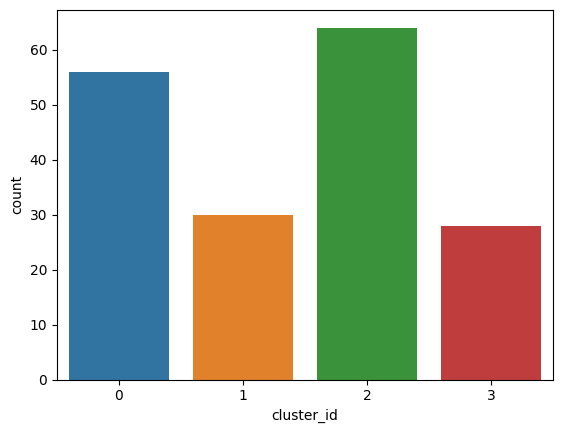

In [ ]:
sns.countplot(x=df['cluster_id'])

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y_pred1)

0.405549198020335

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,n_init=10,max_iter = 300,init='k-means++',random_state=3)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  

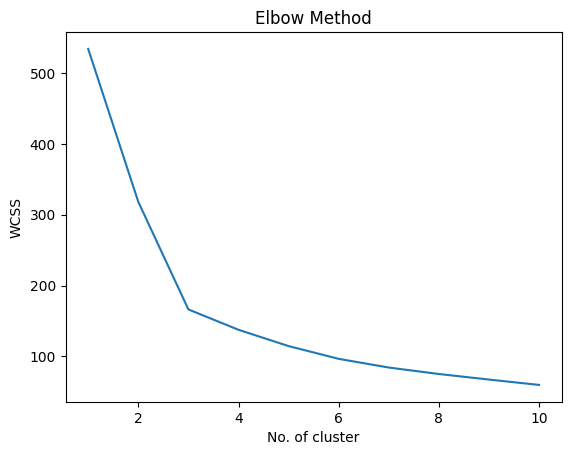

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=3,n_init=20,max_iter = 200,init='k-means++',random_state=123)


In [ ]:
y_pred1 = kmeans1.fit_predict(X)

In [ ]:
label1 = kmeans1.labels_

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,label1)

0.5108077295838934